## Bias Correction and Goal Focus

Bias is a hidden problem in many data sets. Almost all cases, bias is not intentional, but rather the natural result of data entry.

Goal focus means that we look for elements of the data that better represent the objectives for our analysis. This may require transformations or slicing the data to get at the important characteristics for the analysis.

Bias - probably not on purpose, but due to data entry or how the columns are made
Data is not representative of what the situation really is

In [2]:
# Data
import pandas as pd
import numpy as np
import scipy as sp
import os
import string as st
from collections import Counter
import json
from sklearn.preprocessing import StandardScaler

# Statistics
import statsmodels.api as sm
import statsmodels.sandbox.tools.tools_pca as sm_pca
from statsmodels.formula.api import ols as sm_ols
from statsmodels.stats.anova import anova_lm as sm_anova
from patsy.contrasts import Treatment

# Plotting
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import savefig

sns.set(style="darkgrid", color_codes=True)

# Printing
import locale

locale.setlocale( locale.LC_ALL, '' )

%matplotlib inline

# Check for errors

/Users/mead/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Load the accident data

In [24]:
# Read the JSON file
# Make the keys integers again

path = '/Users/mead/Fall2017/DonBrown-DS6001/InClass1/'

file = 'TrainNarratives.txt'


with open(path + file) as json_file:  
    Narrative_dict = json.load(json_file)
    
str_index = [int(x) for x in Narrative_dict.keys()]

Narrative_dict = dict(zip(str_index, Narrative_dict.values()))

In [26]:
# Load the train accident data

path = '/Users/mead/Fall2017/DonBrown-DS6001/InClass1/'

file = 'FullCleanedAdrianWithNewColumns.csv'

accidents_df = pd.read_csv(path + file, low_memory = False)

accidents_df.shape

# Putting Narrative back into the dataframe

accidents_df['Narrative'] = Narrative_dict.values()

accidents_df.shape

(38167, 96)

## In-Class Exercise 1

- Make the following yearly time series plots:

    - Costs of accidents 
    - Number of accidents
    - Number of casualties 
    
    
BIAS HERE IS INFLATION


In [27]:
accidents_yearly = accidents_df.groupby('YEAR')

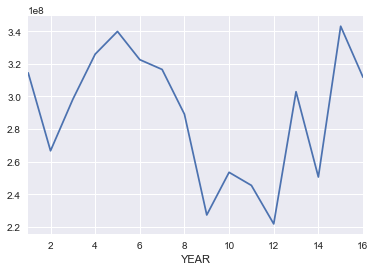

In [28]:

#plt.figure(figsize(8,12))
sns.tsplot(accidents_yearly.ACCDMG.sum(), accidents_yearly.sum().index)


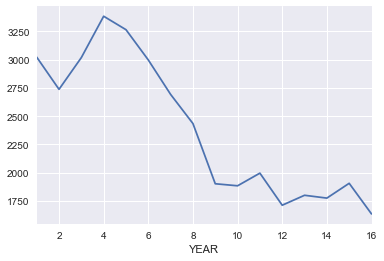

In [29]:

#plt.figure(figsize(8,12))
sns.tsplot(accidents_yearly.ACCDMG.size(), accidents_yearly.sum().index)


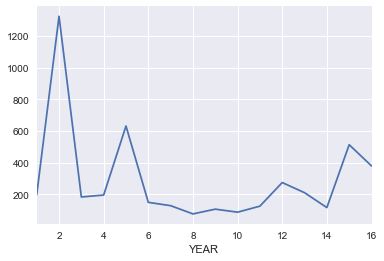

In [30]:

#plt.figure(figsize(8,12))
sns.tsplot(accidents_yearly.Casualties.sum(), accidents_yearly.sum().index)


## In-Class Exercise 2

- Overlay the most expensive accident in each year on the time series plot of cost per year (see the image below)
- What bias is present in this plot?
- Correct for the bias
- Plot the bias corrected variable

You will need this  url: http://data.bls.gov/cgi-bin/cpicalc.pl
   

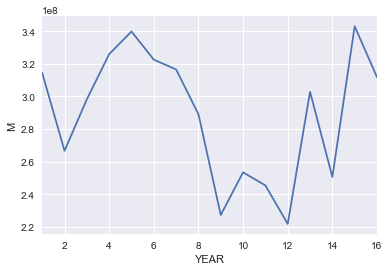

In [31]:
sns.tsplot(accidents_yearly.ACCDMG.sum(), accidents_yearly.sum().index, value = max('ACCDMG'))

In [32]:
accidents_df.YEAR.min()
# So get the inflation with baseline year 2017. Put it in a list. Write a function to go through 
# and multiply each of the ACCDMG years by the multiple amount

1.0

In [ ]:
[2001]

### Cost per Year with the Most Expensive Accidents per Year

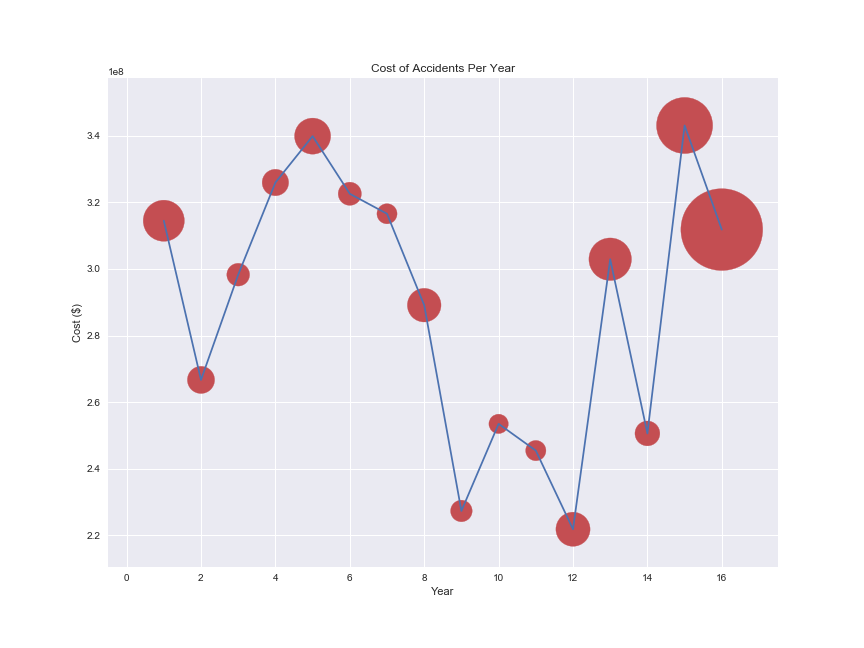



In [ ]:
# Make the new variable ACCDMG2017
# Then do the Log transform as well

## In-Class Exercise 3

Look at the inflation corrected plot. Which year is now the most costly? Look at narrative for the most costly accident in that year. Why is this another example of bias?

Make the correction and replot the time series plot of total accident costs per year with the overlay of the most expensive accident.

SO expensive accident was 9/11. Keep the report? This is a highly unusual accident that doesn't really fall under our scope of understanding the typical train accident. Not really going to help us in understanding the day-to-day of train accidents. Is there anything a train regulator going to be able to do in order to stop 9/11?

In [34]:
accidents_df.loc[(accidents_df.ACCDMG > 1e7) & (accidents_df.YEAR == 1), 'ACCDMG']

1038    16930000.0
Name: ACCDMG, dtype: float64

In [35]:
pd.set_option('display.max_colwidth', -1)
accidents_df.loc[(accidents_df.ACCDMG > 1e7) & (accidents_df.YEAR == 1), 'Narrative']

1038    AT APPROXIMATELY 8:48 AM, PATH POLICE COMMAND WAS NOTIFIED THAT A PLANE STRUCK THE WORLD TRADE CENTER.  AT 8:52 AM TRAIN SERVICE WAS SUSPENDED INTO THE WORLD TRADE CENTER.  ALL PATH EMPLOYEES WERE NOTIFIED BY PHONE TO EVACUATE.  ALL REMAINING EMPLOYEES WERE EVACUATED ON A TRAIN THAT DEPARTED THE STATION AT 9:11 AM.  THE CREW ON THE HOB46 ARRIVING AT WTC WAS INSTRUCTED TO KEEP THE DOORS CLOSED ANDOPERATE THROUGH THE WTC WITHOUT STOPPING.  THESE PASSENGERS WERE RE-ROUTED TO 33RD STREET.  AT 9:02AM THE PATH EMERGENCY OPERATIONS PLAN WAS PUT INTO EFFECT AND REMAINING SERVICE OPERATED ON A 10 MINUTE SCHEDULE. AT 10:45 AM PASSENGER TRAIN OPERATIONS WERE SUSPENDED AS A RESULT OF CONCERNS FOR PUBLIC SAFETY.  BOTH TOWERS FELL CAUSING DEBRIS TO FALL INTO THE STATION AND ON A TRAIN LOCATED ON TRACK3 AT WORLD TRADE CENTER.  CARS IN CONSIST WERE: 612-139-750-731-160-143-745.  FLOODING OCCURRED ANDWATER FLOWED AS FAR AS EXCHANGE PLACE STATION IN JERSEY CITY.  MAINTENANCE PERSONNEL WORKED ROU

In [40]:
index_9_11 = accidents_df.loc[(accidents_df.ACCDMG > 1e7) & (accidents_df.YEAR == 1)].index
accidents_df = accidents_df.drop(index_9_11).shape

## In-Class Exercise 4 - Goal Focus

Look at the box plot of the ACCDMG variable (transformed as in exercise 2, that is, logACCDMG2017). 

BUT do the ACCDMG2017 first. Get the box plot and pull out values like the whiskers
PULL OUT THE most extreme accidents based on the upper whisker of the boxplot
THEN can look at what percentage of total costs extreme accidents make up vs. their total proportion of all accidents
LOOK at extreme accidents with respect to casualties (don't plot the boxplot, not necessary)
ACTUALLY casualties follow a poisson distribution (just pick any model with casualties > 0)
- What derived variables (i.e., dataframe) is suggested in order to focus the analysis on the most significant (in cost) accidents? 
- What percentage the cost of accidents are attribuatable to these exteme accidents?
- What percentage of the numbe of accidents are extreme?

Recall our box plots for casualties.

- What derived dataframe is suggested in order to focus the analysis on accidents that cause casualties?
- What percentage of accidents have casualties?

In [ ]:
accidents_xcasualties_df = accidents_df[]

## In-Class Exercise 5

Graph the following

- Bar plot to compare the percent of costs of accidents for types of accidents for all accidents, extreme damage accidents and accidents with casualties.
- Bar plot to compare the costs of accidents for types of trains for all accidents, extreme damage accidents and accidents with casualties.
- Bar plot to compare the costs of accidents for major causes of accidents for all accidents, extreme damage accidents and accidents with casualties.
- Scatter plots (joint plots) of the log of accident damage vs. train speed to compare the extreme accidents, accidents with casualties and  all accidents.
- Scatter plots (joint plots) of the log of accident damage vs. train speed to compare the extreme accidents, accidents with casualties and  all accidents conditioned on types of accidents and major causes.

THE first plots were bar plots for the different TYPES and across all and extreme accidents

## Transformation Pipeline

Allows you to make a pipeline of data transformations for your data to undergo when you first bring it in.
Gave us a simple example below of creating the casualty variable

In [3]:
# Load our orginial untransformed data

path = "/Users/mead/Fall2017/DonBrown-DS6001/InClass1/"

file = "FullCleanedAdrian.csv"

accidents_clean_df = pd.read_csv(path + file, low_memory = False)

accidents_clean_df.shape
    


(38167, 88)

In [4]:
# Creating Casualty transformation
# two column input


from sklearn.base import BaseEstimator, TransformerMixin

class CasualtiesAdder(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        Casualties = X[:, 0] + X[:,1]
        return Casualties
    





In [5]:
# Need to select columns from the data frame

casualty_variables = ['TOTKLD', 'TOTINJ']
cause_variable = ['CAUSE']


from sklearn.pipeline import FeatureUnion
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [6]:
# Pipeline

from sklearn.pipeline import Pipeline

traindata_tranformer_pipeline = Pipeline([
    ('selector', DataFrameSelector(attribute_names = casualty_variables)),
    ('casualtyVar', CasualtiesAdder())
])

#    ('scaler', StandardScaler())
#('majorCausesVar', CausalValueSelect())

In [7]:
# casualty_var_add = ()
# accidents_df['Casualties'] = casualty_var_add.transform(accidents_df[['TOTKLD', 'TOTINJ']].values)
# accidents_df['Casualties'].mean()

casualty_array =  traindata_tranformer_pipeline.fit_transform(accidents_clean_df)

np.mean(casualty_array)

0.12335263447480808

## Extra Credit (5 points) 

I created a transformation pipeline using the Casualty, Major Cause, and Log of Accident Damage data transformation steps for the train accident data.

In [116]:
# Load our orginial untransformed data

path = "/Users/mead/Fall2017/DonBrown-DS6001/InClass1/"

file = "FullCleanedAdrian.csv"

accidents_clean_df = pd.read_csv(path + file, low_memory = False)

accidents_clean_df.shape

(38167, 88)

In [127]:
# Creating Casualty transformation
# two column input


from sklearn.base import BaseEstimator, TransformerMixin

class CasualtiesAdder(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        Casualties = X[:, 0] + X[:,1]
        return Casualties
    
# Create the Major Cause transformation (first letter of the CAUSE)
# only one column as input

class MajorCauseAdder(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        MajorCause = np.array([x[0][0] for x in X])
        return MajorCause
    
# Create the LogACCDMG transformation (simply the log of ACCDMG)
# only one column as input

class LogACCDMGAdder(BaseEstimator, TransformerMixin):
    def _init_(self):
        pass
    def fit(self, X, y = None):
        return self
    def transform(self, X, y = None):
        LogACCDMG = np.log(X + 1)
        return LogACCDMG
    
    

# accidents_df['LogACCDMG'] = sp.log(accidents_df['ACCDMG'] + 1)

In [128]:
# Need to select columns from the data frame

casualty_variables = ['TOTKLD', 'TOTINJ']
cause_variable = ['CAUSE']
logaccdmg_variable = ['ACCDMG']


from sklearn.pipeline import FeatureUnion
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [129]:
# Pipeline

from sklearn.pipeline import Pipeline

traindata_casualty_pipeline = Pipeline([
    ('selector', DataFrameSelector(attribute_names = casualty_variables)),
    ('casualtyVar', CasualtiesAdder())
])

traindata_majorcause_pipeline = Pipeline([
    ('selector', DataFrameSelector(attribute_names = cause_variable)),
    ('majorCauseVar', MajorCauseAdder())
])

traindata_logaccdmg_pipeline = Pipeline([
    ('selector', DataFrameSelector(attribute_names = logaccdmg_variable)),
    ('logAccDmgVar', LogACCDMGAdder())
])

#    ('scaler', StandardScaler())
#('majorCausesVar', CausalValueSelect())

In [130]:
# casualty_var_add = ()
# accidents_df['Casualties'] = casualty_var_add.transform(accidents_df[['TOTKLD', 'TOTINJ']].values)
# accidents_df['Casualties'].mean()

casualty_array =  traindata_casualty_pipeline.fit_transform(accidents_clean_df)

majorcause_array =  traindata_majorcause_pipeline.fit_transform(accidents_clean_df)

logaccdmg_array =  traindata_logaccdmg_pipeline.fit_transform(accidents_clean_df)

print(np.mean(casualty_array))
print('')
print(pd.value_counts(majorcause_array))
print('')
logaccdmg_array
print(np.mean(logaccdmg_array))

0.123352634475

H    14345
T    12685
M     5478
E     4839
S      820
dtype: int64

10.5161912774
